In [1]:
import torch # for cuda usage
from torch.optim import SGD # optimizer
from torch.nn import CrossEntropyLoss # loss function
from torch.utils.data import DataLoader # Load data
import torchvision.transforms as transforms # normalize image
from dataset import Cifar10, concatenate, class_count # custom dataset and methods
import matplotlib.pyplot as plt
from model import Net
import glob


In [2]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [10]:
DATASET_PATH = "cifar-10-batches-py/data_batch_1"
tuningdata = Cifar10(DATASET_PATH, transform)
tuningloader = DataLoader(tuningdata, batch_size=5, shuffle=True, num_workers=2)

DATASET_PATH = "cifar-10-batches-py/test_batch"
testdata = Cifar10(DATASET_PATH, transform)
testloader = DataLoader(testdata, batch_size=5, shuffle=True, num_workers=2)

In [3]:
cuda = torch.cuda.is_available()
cuda

True

In [4]:
device = torch.device('cuda' if cuda else 'cpu')
device

device(type='cuda')

In [11]:
epochs = 30
tuning_model = Net()
criterion = CrossEntropyLoss()
optimizer = SGD(tuning_model.parameters(), lr=0.001, momentum=0.9)
if(cuda):
    tuning_model.to(device)

In [12]:
hist = tuning_model.train(tuningloader, optimizer, criterion, epochs=epochs)

[1,  2000] loss: 2.250
[2,  2000] loss: 1.850
[3,  2000] loss: 1.618
[4,  2000] loss: 1.514
[5,  2000] loss: 1.431
[6,  2000] loss: 1.350
[7,  2000] loss: 1.277
[8,  2000] loss: 1.203
[9,  2000] loss: 1.140
[10,  2000] loss: 1.062
[11,  2000] loss: 1.006
[12,  2000] loss: 0.921
[13,  2000] loss: 0.841
[14,  2000] loss: 0.779
[15,  2000] loss: 0.723
[16,  2000] loss: 0.644
[17,  2000] loss: 0.572
[18,  2000] loss: 0.538
[19,  2000] loss: 0.489
[20,  2000] loss: 0.443
[21,  2000] loss: 0.401
[22,  2000] loss: 0.387
[23,  2000] loss: 0.353
[24,  2000] loss: 0.338
[25,  2000] loss: 0.320
[26,  2000] loss: 0.325
[27,  2000] loss: 0.262
[28,  2000] loss: 0.257
[29,  2000] loss: 0.295
[30,  2000] loss: 0.241
Finished Training


Text(0.5, 1.0, '10,000 data training')

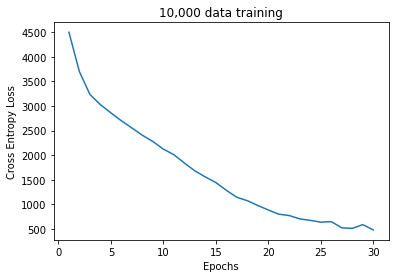

In [17]:
plt.plot(range(1, 31), hist)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title("10,000 data training")

In [14]:
tuning_model.score(testloader)

Accuracy of the network on the 10000 test images: 48 %


In [5]:
# concatenate all batch data
batches_list = []
for batch_data in glob.glob("cifar-10-batches-py/data_batch_*"):
    batches_list.append(Cifar10(batch_data, transform))
batches_list

traindata = concatenate(batches_list)
trainloader = DataLoader(traindata, batch_size=5, shuffle=True, num_workers=2)


In [6]:
model = Net()
criterion = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
if(cuda):
    model.to(device)

In [7]:
hist = model.train(trainloader, optimizer, criterion, epochs=38)

[1, 10000] loss: 8.733
[2, 10000] loss: 6.750
[3, 10000] loss: 6.077
[4, 10000] loss: 5.632
[5, 10000] loss: 5.273
[6, 10000] loss: 4.986
[7, 10000] loss: 4.735
[8, 10000] loss: 4.493
[9, 10000] loss: 4.314
[10, 10000] loss: 4.159
[11, 10000] loss: 4.010
[12, 10000] loss: 3.863
[13, 10000] loss: 3.729
[14, 10000] loss: 3.633
[15, 10000] loss: 3.535
[16, 10000] loss: 3.437
[17, 10000] loss: 3.338
[18, 10000] loss: 3.260
[19, 10000] loss: 3.220
[20, 10000] loss: 3.132
[21, 10000] loss: 3.092
[22, 10000] loss: 3.028
[23, 10000] loss: 2.982
[24, 10000] loss: 2.950
[25, 10000] loss: 2.903
[26, 10000] loss: 2.869
[27, 10000] loss: 2.789
[28, 10000] loss: 2.798
[29, 10000] loss: 2.788
[30, 10000] loss: 2.785
[31, 10000] loss: 2.775
[32, 10000] loss: 2.718
[33, 10000] loss: 2.727
[34, 10000] loss: 2.635
[35, 10000] loss: 2.681
[36, 10000] loss: 2.630
[37, 10000] loss: 2.605
[38, 10000] loss: 2.655
Finished Training


Text(0.5, 1.0, '50,000 data training')

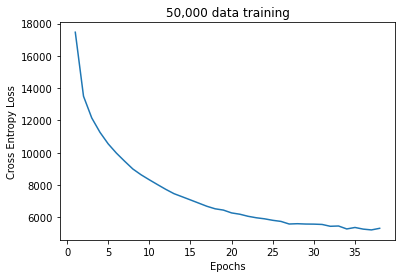

In [8]:
plt.plot(range(1, 39), hist)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title("50,000 data training")

In [11]:
model.score(testloader)

Accuracy of the network on the 10000 test images: 58 %
